# Data Preprocessing with Python

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
try:
    minutes_watch_2021_unpaid = pd.read_csv('minutes_watched_2021_paid_0.csv')
except:
    print('Error while loading the file')
    
minutes_watch_2021_unpaid.head()

,student_id,minutes_watched,paid_in_q2
0,767,0.05,0
1,1067,0.27,0
2,1151,122.35,0
3,1571,77.60,0
4,2058,0.42,0


In [14]:
try:
    minutes_watch_2021_paid = pd.read_csv('minutes_watched_2021_paid_1.csv')
except:
    print('Error while loading the file')
    
minutes_watch_2021_unpaid.head()

,student_id,minutes_watched,paid_in_q2
0,767,0.05,0
1,1067,0.27,0
2,1151,122.35,0
3,1571,77.60,0
4,2058,0.42,0


In [15]:
try:
    minutes_watch_2022_unpaid = pd.read_csv('minutes_watched_2022_paid_0.csv')
except:
    print('Error while loading the file')

minutes_watch_2022_unpaid.head()

,student_id,minutes_watched,paid_in_q2
0,389,0.15,0
1,801,5732.58,0
2,875,46.77,0
3,1357,0.12,0
4,1373,45.92,0


In [16]:
try:
    minutes_watch_2022_paid = pd.read_csv('minutes_watched_2022_paid_1.csv')
except:
    print('Error while loading the file')

minutes_watch_2022_paid.head()

,student_id,minutes_watched,paid_in_q2
0,616,116.02,1
1,618,238.15,1
2,838,348.28,1
3,841,324.75,1
4,862,166.73,1


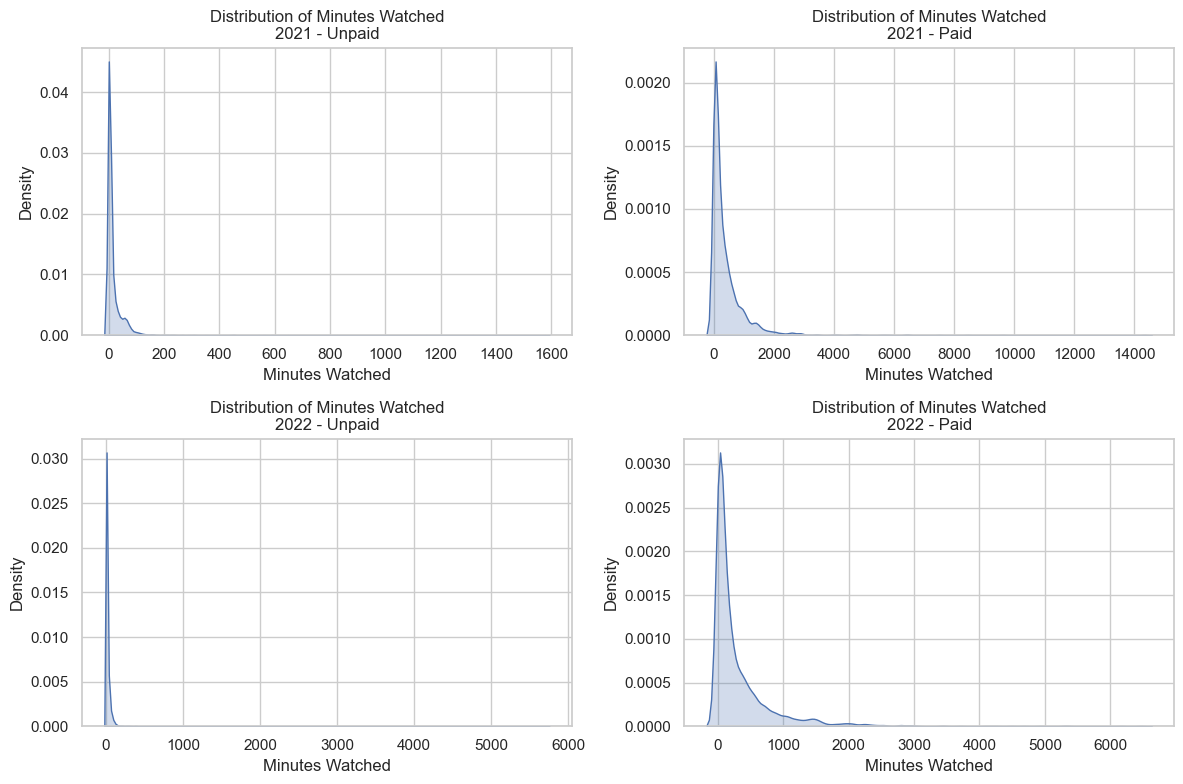

In [17]:
datasets = [
    (minutes_watch_2021_unpaid, '2021 - Unpaid'),
    (minutes_watch_2021_paid,   '2021 - Paid'),
    (minutes_watch_2022_unpaid, '2022 - Unpaid'),
    (minutes_watch_2022_paid,   '2022 - Paid')
]

# Plot
sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (df, title) in enumerate(datasets):
    sns.kdeplot(data=df['minutes_watched'], ax=axes[i], fill=True, bw_adjust=0.5)
    axes[i].set_title(f'Distribution of Minutes Watched\n{title}')
    axes[i].set_xlabel('Minutes Watched')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [22]:
# Remove outliers by keeping only the data below the 99th percentile
q1 = minutes_watch_2021_unpaid['minutes_watched'].quantile(0.99)
data_no_outliers1 = minutes_watch_2021_unpaid[minutes_watch_2021_unpaid['minutes_watched']<q1]

q2 = minutes_watch_2021_paid['minutes_watched'].quantile(0.99)
data_no_outliers2 = minutes_watch_2021_paid[minutes_watch_2021_paid['minutes_watched']<q2]

q3 = minutes_watch_2022_unpaid['minutes_watched'].quantile(0.99)
data_no_outliers3 = minutes_watch_2022_unpaid[minutes_watch_2022_unpaid['minutes_watched']<q3]

q4 = minutes_watch_2022_paid['minutes_watched'].quantile(0.99)
data_no_outliers4 = minutes_watch_2022_paid[minutes_watch_2022_paid['minutes_watched']<q4]

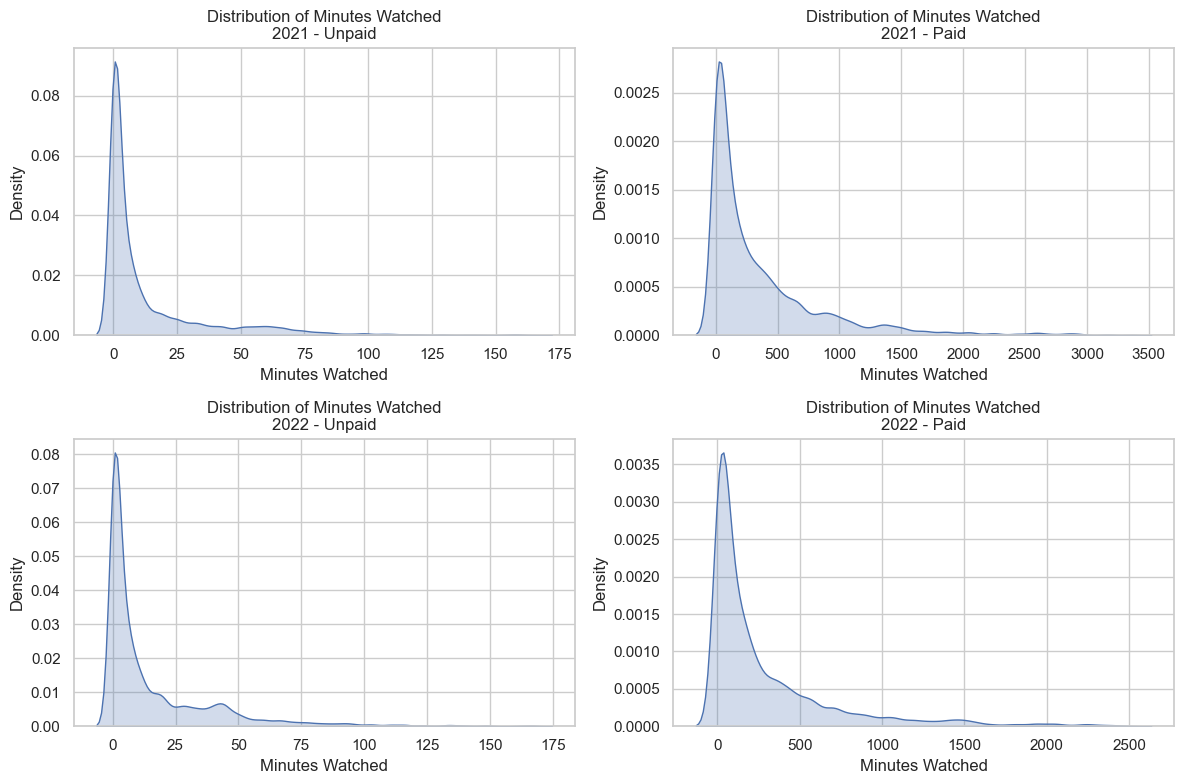

In [23]:
datasets = [
    (data_no_outliers1, '2021 - Unpaid'),
    (data_no_outliers2,   '2021 - Paid'),
    (data_no_outliers3, '2022 - Unpaid'),
    (data_no_outliers4,   '2022 - Paid')
]

# Plot
sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (df, title) in enumerate(datasets):
    sns.kdeplot(data=df['minutes_watched'], ax=axes[i], fill=True, bw_adjust=0.5)
    axes[i].set_title(f'Distribution of Minutes Watched\n{title}')
    axes[i].set_xlabel('Minutes Watched')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [24]:
data_no_outliers1.to_csv('minutes_watched_2021_paid_0_no_outliers.csv', index=False)
data_no_outliers2.to_csv('minutes_watched_2021_paid_1_no_outliers.csv', index=False)
data_no_outliers3.to_csv('minutes_watched_2022_paid_0_no_outliers.csv', index=False)
data_no_outliers4.to_csv('minutes_watched_2022_paid_1_no_outliers.csv', index=False)